In [11]:
import pandas as pd
import numpy as np

data=pd.read_excel("Preprocessing.xlsx")
data.head()

,Unnamed: 0,Tweet,Object,Sentiment,tweet_cleansing,tweet_casefolding,tweet_convertnegation,tweet_tokens,tweet_normalization,tweet_stopwordremoval,tweet_stemming
0,0,tolong cepat bantu proses orderan diteruskan k...,Bukalapak,Negatif,tolong cepat bantu proses orderan diteruskan k...,tolong cepat bantu proses orderan diteruskan k...,tolong cepat bantu proses orderan diteruskan k...,"['tolong', 'cepat', 'bantu', 'proses', 'ordera...","['tolong', 'cepat', 'bantu', 'proses', 'ordera...","['cepat', 'bantu', 'proses', 'orderan', 'diter...","['cepat', 'bantu', 'proses', 'order', 'terus',..."
1,1,Kalau bisa sih barang nya di jadiin aja jangan...,Bukalapak,Negatif,Kalau bisa sih barang nya di jadiin aja jangan...,kalau bisa sih barang nya di jadiin aja jangan...,kalau bisa sih barang nya di jadiin aja jangan...,"['kalau', 'bisa', 'sih', 'barang', 'nya', 'di'...","['kalau', 'bisa', 'sih', 'barang', 'nya', 'di'...","['barang', 'kembalikan', 'dananya']","['barang', 'kembali', 'dana']"
2,2,Terima kasih kak Kendala sudah terselesaikan s...,Bukalapak,Positif,Terima kasih kak Kendala sudah terselesaikan s...,terima kasih kak kendala sudah terselesaikan s...,terima kasih kak kendala sudah terselesaikan s...,"['terima', 'kasih', 'kak', 'kendala', 'sudah',...","['terima', 'kasih', 'kakak', 'kendala', 'sudah...","['terima', 'kasih', 'kendala', 'terselesaikan']","['terima', 'kasih', 'kendala', 'selesai']"
3,3,Back Min pejualan film porno banyak di tempat ...,Bukalapak,Negatif,Back Min pejualan film porno banyak di tempat ...,back min pejualan film porno banyak di tempat ...,back min pejualan film porno banyak di tempat ...,"['back', 'min', 'pejualan', 'film', 'porno', '...","['kembali', 'admin', 'pejualan', 'film', 'porn...","['admin', 'pejualan', 'film', 'pornografi', 'j...","['admin', 'jual', 'film', 'pornografi', 'janga..."
4,4,Belum ada masuk kak email nya,Bukalapak,Negatif,Belum ada masuk kak email nya,belum ada masuk kak email nya,belum ada masuk kak email nya,"['belum', 'ada', 'masuk', 'kak', 'email', 'nya']","['belum', 'ada', 'masuk', 'kakak', 'email', 'n...","['masuk', 'email']","['masuk', 'email']"


In [12]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data["tweet_preprocessing"] = data["tweet_stemming"].apply(join_text_list)
data["tweet_preprocessing"].head()

0    cepat bantu proses order terus bukadompet orde...
1                                  barang kembali dana
2                         terima kasih kendala selesai
3    admin jual film pornografi janganrusak polri h...
4                                          masuk email
Name: tweet_preprocessing, dtype: object

In [13]:
datapreprocessing= data.drop(columns=['tweet_cleansing','tweet_casefolding','tweet_convertnegation','tweet_tokens','tweet_normalization','tweet_stopwordremoval','tweet_stemming'])
datapreprocessing.head()

,Unnamed: 0,Tweet,Object,Sentiment,tweet_preprocessing
0,0,tolong cepat bantu proses orderan diteruskan k...,Bukalapak,Negatif,cepat bantu proses order terus bukadompet orde...
1,1,Kalau bisa sih barang nya di jadiin aja jangan...,Bukalapak,Negatif,barang kembali dana
2,2,Terima kasih kak Kendala sudah terselesaikan s...,Bukalapak,Positif,terima kasih kendala selesai
3,3,Back Min pejualan film porno banyak di tempat ...,Bukalapak,Negatif,admin jual film pornografi janganrusak polri h...
4,4,Belum ada masuk kak email nya,Bukalapak,Negatif,masuk email


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

doc = datapreprocessing['tweet_preprocessing']

#vocabulary
cvector = CountVectorizer()
cvector.fit(doc)

#TF vector
vectorizer = CountVectorizer().fit_transform(doc)
#Normalize TF vector
norm_count = normalize(vectorizer,norm='l1', axis=1)

#IDF vector
tfidf = TfidfVectorizer()
tf_idf1 = tfidf.fit_transform(doc)

#TFIDF vector
tf_idf = norm_count.multiply(tfidf.idf_)

In [5]:
#hasil proses transformasi
print (cvector.vocabulary_)

{'cepat': 496, 'bantu': 191, 'proses': 2150, 'order': 1942, 'terus': 2688, 'bukadompet': 368, 'tahan': 2597, 'bukalapak': 373, 'beli': 244, 'terima': 2677, 'paket': 1962, 'directmessage': 658, 'kirim': 1360, 'barang': 198, 'kembali': 1303, 'dana': 580, 'kasih': 1268, 'kendala': 1312, 'selesai': 2381, 'admin': 13, 'jual': 1205, 'film': 780, 'pornografi': 2107, 'janganrusak': 1143, 'polri': 2104, 'https': 969, 'masuk': 1666, 'email': 730, 'main': 1611, 'rumah': 2291, 'masak': 1660, 'belanja': 242, 'transaksi': 3071, 'cumakasih': 555, 'foto': 799, 'bentuk': 256, 'screenshot': 2352, 'jam': 1083, 'adminnya': 14, 'bego': 233, 'bilang': 287, 'tidaksesuai': 2963, 'hati': 934, 'hadap': 901, 'diskusi': 668, 'aneh': 82, 'tidakjam': 2817, 'bukti': 433, 'tidakunsur': 3008, 'tipu': 3037, 'penuh': 2033, 'cinta': 520, 'sofa': 2508, 'dikuasain': 647, 'bella': 248, 'lapak': 1503, 'batal': 209, 'ubah': 3114, 'kredivo': 1422, 'mohon': 1775, 'jasa': 1171, 'bebas': 230, 'nomor': 1885, 'tidakserta': 2962, 'v

In [8]:
print (vectorizer)

  (0, 191)	1
  (0, 244)	1
  (0, 368)	1
  (0, 373)	1
  (0, 496)	1
  (0, 658)	1
  (0, 1360)	1
  (0, 1942)	2
  (0, 1962)	1
  (0, 2150)	1
  (0, 2597)	1
  (0, 2677)	1
  (0, 2688)	1
  (1, 198)	1
  (1, 580)	1
  (1, 1303)	1
  (2, 1268)	1
  (2, 1312)	1
  (2, 2381)	1
  (2, 2677)	1
  (3, 13)	1
  (3, 780)	1
  (3, 969)	1
  (3, 1143)	1
  (3, 1205)	1
  :	:
  (4695, 1513)	1
  (4695, 1666)	1
  (4695, 2144)	1
  (4695, 2381)	1
  (4695, 2700)	1
  (4695, 3160)	1
  (4696, 13)	1
  (4696, 922)	1
  (4696, 1885)	1
  (4696, 2495)	1
  (4696, 2650)	1
  (4696, 3114)	1
  (4696, 3179)	1
  (4697, 496)	1
  (4697, 2150)	1
  (4697, 2420)	1
  (4698, 496)	1
  (4698, 593)	1
  (4698, 700)	2
  (4698, 1512)	1
  (4698, 2123)	1
  (4698, 2150)	2
  (4698, 2420)	1
  (4698, 3052)	1
  (4698, 3097)	2


In [10]:
#Nilai TF
print ("\t    Nilai TF")
print (norm_count)

	    Nilai TF
  (0, 191)	0.07142857142857142
  (0, 244)	0.07142857142857142
  (0, 368)	0.07142857142857142
  (0, 373)	0.07142857142857142
  (0, 496)	0.07142857142857142
  (0, 658)	0.07142857142857142
  (0, 1360)	0.07142857142857142
  (0, 1942)	0.14285714285714285
  (0, 1962)	0.07142857142857142
  (0, 2150)	0.07142857142857142
  (0, 2597)	0.07142857142857142
  (0, 2677)	0.07142857142857142
  (0, 2688)	0.07142857142857142
  (1, 198)	0.3333333333333333
  (1, 580)	0.3333333333333333
  (1, 1303)	0.3333333333333333
  (2, 1268)	0.25
  (2, 1312)	0.25
  (2, 2381)	0.25
  (2, 2677)	0.25
  (3, 13)	0.14285714285714285
  (3, 780)	0.14285714285714285
  (3, 969)	0.14285714285714285
  (3, 1143)	0.14285714285714285
  (3, 1205)	0.14285714285714285
  :	:
  (4695, 1513)	0.09090909090909091
  (4695, 1666)	0.09090909090909091
  (4695, 2144)	0.09090909090909091
  (4695, 2381)	0.09090909090909091
  (4695, 2700)	0.09090909090909091
  (4695, 3160)	0.09090909090909091
  (4696, 13)	0.14285714285714285
  (4696, 922

In [27]:
#IDF
print ("\t\t\t    Nilai IDF")
print (tfidf.idf_[496:592])

			    Nilai IDF
[4.6111307  7.50940764 8.76217061 8.76217061 8.76217061 6.89036843
 8.76217061 8.76217061 6.51087881 8.76217061 8.76217061 8.76217061
 8.76217061 5.20682255 8.06902343 5.09860896 8.76217061 7.37587625
 8.76217061 8.76217061 7.25809321 8.3567055  8.3567055  8.76217061
 5.19263791 8.3567055  8.76217061 8.76217061 8.76217061 8.76217061
 8.76217061 8.76217061 8.76217061 6.31982357 7.50940764 6.74726759
 8.76217061 8.76217061 8.76217061 8.3567055  8.76217061 8.76217061
 8.76217061 8.76217061 8.3567055  8.76217061 8.76217061 8.3567055
 8.76217061 8.76217061 8.76217061 8.76217061 8.76217061 8.76217061
 8.3567055  8.76217061 7.66355832 8.76217061 7.66355832 8.3567055
 6.45958551 8.76217061 7.25809321 8.3567055  8.76217061 7.50940764
 8.76217061 5.07329115 8.76217061 8.3567055  7.84587988 7.84587988
 5.56349749 8.76217061 7.50940764 6.15948092 8.76217061 8.76217061
 8.76217061 8.76217061 8.3567055  8.76217061 8.3567055  8.76217061
 4.24038203 8.76217061 7.37587625 8.76217061 8.

In [12]:
#TFIDF
print ("\t    Nilai TFIDF")
print (tf_idf)

	    Nilai TFIDF
  (0, 191)	0.26269039031967806
  (0, 244)	0.21329053363588407
  (0, 368)	0.5268483032870224
  (0, 373)	0.26940985859710487
  (0, 496)	0.32936647865996843
  (0, 658)	0.3146758414606152
  (0, 1360)	0.2672560701563415
  (0, 1942)	0.7890703078534034
  (0, 1962)	0.3208909398170173
  (0, 2150)	0.34094189718385215
  (0, 2597)	0.4118884523988724
  (0, 2677)	0.2718816821097817
  (0, 2688)	0.49216917358832946
  (1, 198)	1.001615788517991
  (1, 580)	1.413460676696388
  (1, 1303)	1.5504322476549643
  (2, 1268)	0.9632997417046123
  (2, 1312)	1.3619961506164198
  (2, 2381)	1.1013654451121533
  (2, 2677)	0.951585887384236
  (3, 13)	0.32722820127518465
  (3, 780)	1.1527176323683226
  (3, 969)	1.2517386581626007
  (3, 1143)	1.1938150712900057
  (3, 1205)	0.5114838652637314
  :	:
  (4695, 1513)	0.7965609642852914
  (4695, 1666)	0.34444464541688347
  (4695, 2144)	0.6598266554874482
  (4695, 2381)	0.4004965254953285
  (4695, 2700)	0.3502908151653136
  (4695, 3160)	0.5918980735028827
  (46

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

le = preprocessing.LabelEncoder() 
y = le.fit_transform(data['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(tf_idf,y,test_size=0.2) 
print(X_train.shape) 
print(X_test.shape) 

#crossvalidation 
from sklearn.model_selection import ShuffleSplit 
n_samples = X_train.shape[0] 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) 
print(cv)

(3759, 3242)
(940, 3242)
ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)


In [16]:
parameter_linear={'C':[0.001, 0.01, 0.1, 1, 10, 100]}
parameter_rbf={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
parameter_sigmoid={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'coef0':[0, 1, 5, 8, 10]}
parameter_poly={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'coef0':[0, 1, 5, 8, 10],
              'degree':[0, 1, 2, 3]}

In [17]:
#import library modeling
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [18]:
#Import library evaluasi
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
#Penggunaan Kernel Linear
svclassifier_linear = SVC(kernel='linear') 
print('svclassifier_linear') 

#Implement SVM dengan Cross Validation 
model_linear = GridSearchCV(estimator=svclassifier_linear, param_grid=parameter_linear, cv=cv) 
model_linear.fit(X_train, y_train)

svclassifier_linear


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [20]:
#LINEAR
y_pred_linear = model_linear.predict(X_test)
print("\t\t  *EVALUASI KERNEL LINEAR*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nReport:\n", classification_report(y_test, y_pred_linear))
print("Best Parameters:", model_linear.best_params_)

		  *EVALUASI KERNEL LINEAR*
Confusion Matrix:
 [[574   4]
 [ 75 287]]

Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       578
           1       0.99      0.79      0.88       362

    accuracy                           0.92       940
   macro avg       0.94      0.89      0.91       940
weighted avg       0.92      0.92      0.91       940

Best Parameters: {'C': 0.1}


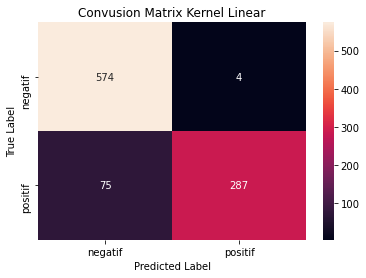

In [21]:
#LINEAR
cm=confusion_matrix(y_test, y_pred_linear)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Linear")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
df_linear = pd.DataFrame(model_linear.cv_results_)
df_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.411131,0.194580,0.206669,0.053319,0.001,{'C': 0.001},0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,6
1,1.026860,0.082269,0.146522,0.007437,0.01,{'C': 0.01},0.820479,0.781915,0.820479,0.795213,0.819149,0.793883,0.807181,0.789894,0.807181,0.805851,0.804122,0.012893,5
2,0.759499,0.022243,0.103220,0.015377,0.1,{'C': 0.1},0.885638,0.873670,0.894947,0.878989,0.892287,0.878989,0.873670,0.860372,0.897606,0.884309,0.882048,0.010771,1
3,1.002555,0.072581,0.076528,0.008359,1,{'C': 1},0.885638,0.857713,0.892287,0.864362,0.884309,0.880319,0.882979,0.855053,0.890957,0.885638,0.877926,0.012972,2
4,1.665943,0.245128,0.065747,0.006613,10,{'C': 10},0.839096,0.839096,0.856383,0.836436,0.861702,0.832447,0.837766,0.843085,0.836436,0.868351,0.845080,0.011763,3
5,3.664017,1.066932,0.060163,0.004922,100,{'C': 100},0.828457,0.839096,0.845745,0.823138,0.837766,0.829787,0.820479,0.821809,0.836436,0.825798,0.830851,0.008063,4


In [23]:
df_linear[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.610239
1,0.01,0.804122
2,0.1,0.882048
3,1,0.877926
4,10,0.845080
5,100,0.830851


In [47]:
model_linear.best_score_

0.8820478723404255

In [24]:
df_linear.to_excel("ParameterLinear_copy6.xlsx")

In [32]:
#Penggunaan Kernel RBF
svclassifier_rbf = SVC(kernel='rbf') 
print('svclassifier_rbf') 

#Implement SVM dengan Cross Validation 
model_rbf = GridSearchCV(estimator=svclassifier_rbf, param_grid=parameter_rbf, cv=cv) 
model_rbf.fit(X_train, y_train)

svclassifier_rbf


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [33]:
#RBF
y_pred_rbf = model_rbf.predict(X_test)
print("\t\t  *EVALUASI KERNEL RBF*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nReport:\n", classification_report(y_test, y_pred_rbf))
print("Best Parameters:", model_rbf.best_params_)

		  *EVALUASI KERNEL RBF*
Confusion Matrix:
 [[563  15]
 [ 64 298]]

Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       578
           1       0.95      0.82      0.88       362

    accuracy                           0.92       940
   macro avg       0.93      0.90      0.91       940
weighted avg       0.92      0.92      0.91       940

Best Parameters: {'C': 10, 'gamma': 0.01}


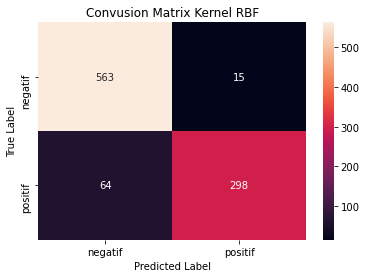

In [34]:
#RBF
cm=confusion_matrix(y_test, y_pred_rbf)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel RBF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
df_rbf = pd.DataFrame(model_rbf.cv_results_)
df_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.215908,0.115589,0.258117,0.066095,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
1,1.184007,0.039419,0.242125,0.029864,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
2,1.293697,0.031858,0.229670,0.007239,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
3,1.126682,0.077864,0.245301,0.018538,0.001,1,"{'C': 0.001, 'gamma': 1}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
4,1.706340,0.067584,0.292169,0.019754,0.001,10,"{'C': 0.001, 'gamma': 10}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
5,2.318677,0.077888,0.537479,0.010395,0.001,100,"{'C': 0.001, 'gamma': 100}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
6,1.240598,0.076274,0.242164,0.012605,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
7,1.320693,0.022540,0.231011,0.006174,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
8,1.271891,0.062223,0.221836,0.006265,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24
9,1.371863,0.043487,0.312456,0.009885,0.01,1,"{'C': 0.01, 'gamma': 1}",0.610372,0.589096,0.631649,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,24


In [48]:
df_rbf[['param_C', 'param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.001,0.001,0.610239
1,0.001,0.01,0.610239
2,0.001,0.1,0.610239
3,0.001,1,0.610239
4,0.001,10,0.610239
5,0.001,100,0.610239
6,0.01,0.001,0.610239
7,0.01,0.01,0.610239
8,0.01,0.1,0.610239
9,0.01,1,0.610239


In [46]:
model_rbf.best_score_

0.8875

In [37]:
df_rbf.to_excel("ParameterRbf_Copy6.xlsx")

In [38]:
#Penggunaan Kernel Sigmoid
svclassifier_sigmoid = SVC(kernel='sigmoid') 
print(svclassifier_sigmoid) 
#Implement SVM dengan Cross Validation 
model_sigmoid= GridSearchCV(estimator=svclassifier_sigmoid, param_grid=parameter_sigmoid, cv=cv) 
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 1, 5, 8, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [40]:
#SIGMOID
y_pred_sigmoid = model_sigmoid.predict(X_test)
print("\t\t  *EVALUASI KERNEL SIGMOID*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("\nReport:\n", classification_report(y_test, y_pred_sigmoid))
print("Best Parameters:", model_sigmoid.best_params_)

		  *EVALUASI KERNEL SIGMOID*
Confusion Matrix:
 [[565  13]
 [ 64 298]]

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       578
           1       0.96      0.82      0.89       362

    accuracy                           0.92       940
   macro avg       0.93      0.90      0.91       940
weighted avg       0.92      0.92      0.92       940

Best Parameters: {'C': 100, 'coef0': 1, 'gamma': 0.01}


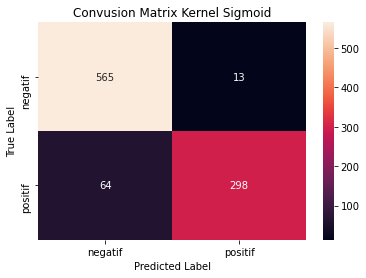

In [41]:
#SIGMOID
cm=confusion_matrix(y_test, y_pred_sigmoid)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Sigmoid")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
df_sigmoid = pd.DataFrame(model_sigmoid.cv_results_)
df_sigmoid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.248210,0.243391,0.228870,0.087300,0.001,0,0.001,"{'C': 0.001, 'coef0': 0, 'gamma': 0.001}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
1,1.352514,0.428998,0.231559,0.083488,0.001,0,0.01,"{'C': 0.001, 'coef0': 0, 'gamma': 0.01}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
2,1.386510,0.451962,0.213488,0.041913,0.001,0,0.1,"{'C': 0.001, 'coef0': 0, 'gamma': 0.1}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
3,1.524292,0.271481,0.236040,0.057986,0.001,0,1,"{'C': 0.001, 'coef0': 0, 'gamma': 1}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
4,1.168752,0.026866,0.181183,0.007618,0.001,0,10,"{'C': 0.001, 'coef0': 0, 'gamma': 10}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.173369,0.014730,0.278157,0.006214,100,10,0.01,"{'C': 100, 'coef0': 10, 'gamma': 0.01}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
176,1.193716,0.018635,0.274994,0.007656,100,10,0.1,"{'C': 100, 'coef0': 10, 'gamma': 0.1}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
177,1.185919,0.021533,0.279657,0.010965,100,10,1,"{'C': 100, 'coef0': 10, 'gamma': 1}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42
178,1.160954,0.012259,0.279642,0.004678,100,10,10,"{'C': 100, 'coef0': 10, 'gamma': 10}",0.610372,0.589096,...,0.613032,0.62367,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,42


In [43]:
df_sigmoid[['param_C', 'param_gamma', 'param_coef0', 'mean_test_score']]

,param_C,param_gamma,param_coef0,mean_test_score
0,0.001,0.001,0,0.610239
1,0.001,0.01,0,0.610239
2,0.001,0.1,0,0.610239
3,0.001,1,0,0.610239
4,0.001,10,0,0.610239
...,...,...,...,...
175,100,0.01,10,0.610239
176,100,0.1,10,0.610239
177,100,1,10,0.610239
178,100,10,10,0.610239


In [45]:
model_sigmoid.best_score_

0.8872340425531915

In [ ]:
model_sigmoid.best_params_

In [44]:
df_sigmoid.to_excel("ParameterSigmoid_Copy6.xlsx")

In [25]:
#Penggunaan Kernel Polynomial
svclassifier_poly = SVC(kernel='poly') 
print(svclassifier_poly) 
#Implement SVM dengan Cross Validation 
model_poly= GridSearchCV(estimator=svclassifier_poly, param_grid=parameter_poly, cv=cv) 
model_poly.fit(X_train, y_train)

SVC(kernel='poly')


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 1, 5, 8, 10], 'degree': [0, 1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [26]:
#POLYNOMIAL
y_pred_poly = model_poly.predict(X_test)
print("\t\t  *EVALUASI KERNEL POLYNOMIAL*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nReport:\n", classification_report(y_test, y_pred_poly))
print("Best Parameters:", model_poly.best_params_)

		  *EVALUASI KERNEL POLYNOMIAL*
Confusion Matrix:
 [[562  16]
 [ 69 293]]

Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       578
           1       0.95      0.81      0.87       362

    accuracy                           0.91       940
   macro avg       0.92      0.89      0.90       940
weighted avg       0.91      0.91      0.91       940

Best Parameters: {'C': 0.001, 'coef0': 10, 'degree': 3, 'gamma': 1}


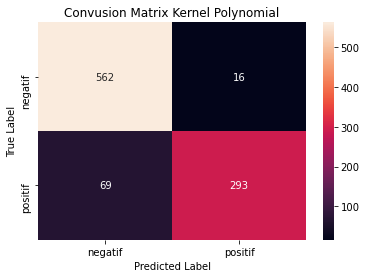

In [27]:
#POLYNOMIAL
cm=confusion_matrix(y_test, y_pred_poly)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Polynomial")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
df_poly = pd.DataFrame(model_poly.cv_results_)
df_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.861949,0.251475,0.190025,0.061459,0.001,0,0,0.001,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.610372,...,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,442
1,0.696786,0.017360,0.153176,0.006225,0.001,0,0,0.01,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.610372,...,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,442
2,0.742159,0.062948,0.167185,0.018560,0.001,0,0,0.1,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.610372,...,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,442
3,0.704647,0.021509,0.151575,0.007102,0.001,0,0,1,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma': 1}",0.610372,...,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,442
4,0.696950,0.012467,0.148315,0.007860,0.001,0,0,10,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.610372,...,0.613032,0.623670,0.586436,0.615691,0.607713,0.621011,0.603723,0.610239,0.013619,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2.051495,0.198383,0.064059,0.004688,100,10,3,0.01,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': ...",0.836436,...,0.827128,0.845745,0.843085,0.827128,0.828457,0.849734,0.828457,0.837633,0.009449,276
716,1.214027,0.040767,0.079679,0.004686,100,10,3,0.1,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': ...",0.856383,...,0.844415,0.865691,0.851064,0.841755,0.844415,0.864362,0.859043,0.854521,0.008498,215
717,1.084364,0.026330,0.107783,0.004697,100,10,3,1,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': 1}",0.872340,...,0.867021,0.893617,0.878989,0.863032,0.868351,0.893617,0.888298,0.879521,0.011807,100
718,1.468701,0.054140,0.149993,0.007665,100,10,3,10,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': 10}",0.855053,...,0.859043,0.892287,0.865691,0.856383,0.851064,0.881649,0.863032,0.866755,0.012286,176


In [29]:
df_poly[['param_C', 'param_gamma', 'param_coef0', 'param_degree','mean_test_score']]

,param_C,param_gamma,param_coef0,param_degree,mean_test_score
0,0.001,0.001,0,0,0.610239
1,0.001,0.01,0,0,0.610239
2,0.001,0.1,0,0,0.610239
3,0.001,1,0,0,0.610239
4,0.001,10,0,0,0.610239
...,...,...,...,...,...
715,100,0.01,10,3,0.837633
716,100,0.1,10,3,0.854521
717,100,1,10,3,0.879521
718,100,10,10,3,0.866755


In [49]:
model_poly.best_score_

0.8909574468085106

In [31]:
df_poly.to_excel("ParameterPoly_Copy6.xlsx")

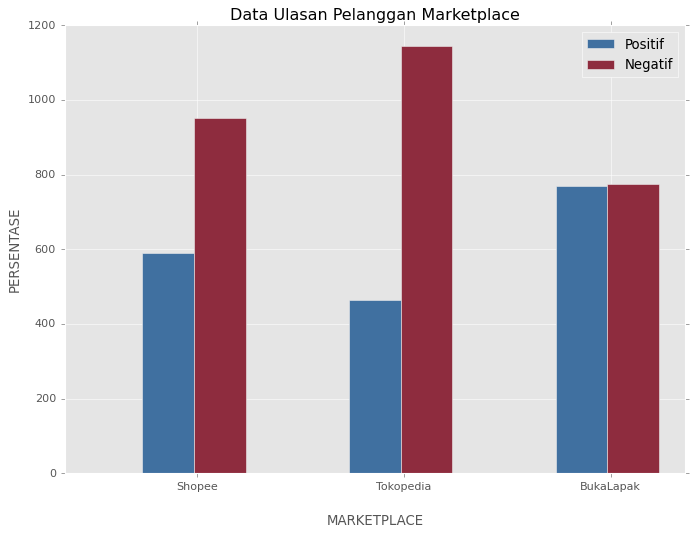

In [78]:
#import
import matplotlib.pyplot as plt


# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 7])
# Data to be plotted
data_shopee = data.loc[data.Object == 'Shopee']
data_tokopedia = data.loc[data.Object == 'Tokopedia']
data_bukalapak = data.loc[data.Object == 'Bukalapak']

#deklarasi
positif_shopee = len(data_shopee.loc[data_shopee.Sentiment == 'Positif'])
negatif_shopee = len(data_shopee.loc[data_shopee.Sentiment == 'Negatif'])

positif_tokopedia = len(data_tokopedia.loc[data_tokopedia.Sentiment == 'Positif'])
negatif_tokopedia= len(data_tokopedia.loc[data_tokopedia.Sentiment == 'Negatif'])

positif_bukalapak = len(data_bukalapak.loc[data_bukalapak.Sentiment == 'Positif'])
negatif_bukalapak = len(data_bukalapak.loc[data_bukalapak.Sentiment == 'Negatif'])

shopeef = {'positif': positif_shopee, 'negatif': negatif_shopee}
tokopediaf = {'positif': positif_tokopedia, 'negatif': negatif_tokopedia}
bukalapakf = {'positif': positif_bukalapak, 'negatif': negatif_bukalapak}

positif=[positif_shopee, positif_tokopedia, positif_bukalapak]
negatif=[negatif_shopee, negatif_tokopedia, negatif_bukalapak]

X = np.arange(len(positif))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, positif, color = '#4070a0', width = 0.25)
plt.bar(X + 0.25, negatif, color = '#8e2c3e', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Positif', 'Negatif'])

# Overiding the x axis with the country names
plt.xticks([i + 0.14 for i in range(3)], ['Shopee', 'Tokopedia', 'BukaLapak'])

#style
plt.style.use('classic')

# Giving the tilte for the plot
plt.title("Data Ulasan Pelanggan Marketplace")

# Namimg the x and y axis
plt.xlabel('\nMARKETPLACE')
plt.ylabel('PERSENTASE')

# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

In [19]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data_visualisasi = data["tweet_stemming"].apply(join_text_list)
print (data_visualisasi)

0       cepat bantu proses order terus bukadompet orde...
1                                     barang kembali dana
2                            terima kasih kendala selesai
3       admin jual film pornografi janganrusak polri h...
4                                             masuk email
                              ...                        
4694    transaksi tokopedia sms notifikasi bank hasil ...
4695    admin id barang masuk empat tidakada progres u...
4696    admin verifikasi ubah nomor telepon handphone ...
4697                              cepat proses sertifikat
4698    latih dunia sertifikat dashboard prakerja duni...
Name: tweet_stemming, Length: 4699, dtype: object


In [20]:
from wordcloud import WordCloud 
from wordcloud import ImageColorGenerator 
import matplotlib.pyplot as plt

tweet = data.tweet_preprocessing

positif = tweet.loc[data.Sentiment == 'Positif']
negatif = tweet.loc[data.Sentiment == 'Negatif']

wp_shopee=positif.loc[data.Object=='Shopee']
wp_tokopedia=positif.loc[data.Object=='Tokopedia']
wp_bukalapak=positif.loc[data.Object=='Bukalapak']

wn_shopee=negatif.loc[data.Object=='Shopee']
wn_tokopedia=negatif.loc[data.Object=='Tokopedia']
wn_bukalapak=negatif.loc[data.Object=='Bukalapak']

WordCloud Positif Shopee:


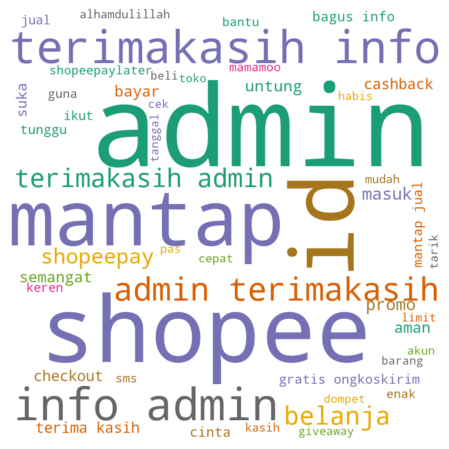

WordCloud Negatif Shopee:


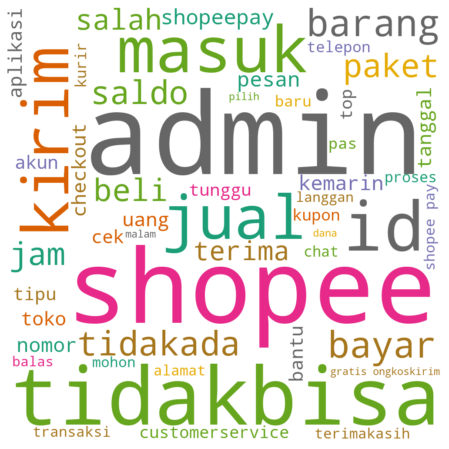

In [38]:
print ("WordCloud Positif Shopee:")
text_positif_shopee = ' '.join(str(word) for word in wp_shopee)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_positif_shopee) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('positif_shopee.png')
plt.show()

print ("WordCloud Negatif Shopee:")
text_negatif_shopee = ' '.join(str(word) for word in wn_shopee)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_negatif_shopee) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('negatif_shopee.png')
plt.show()


WordCloud Positif Tokopedia:


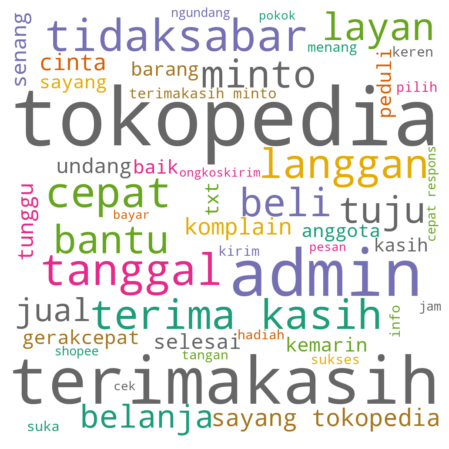

WordCloud Negatif Tokopedia:


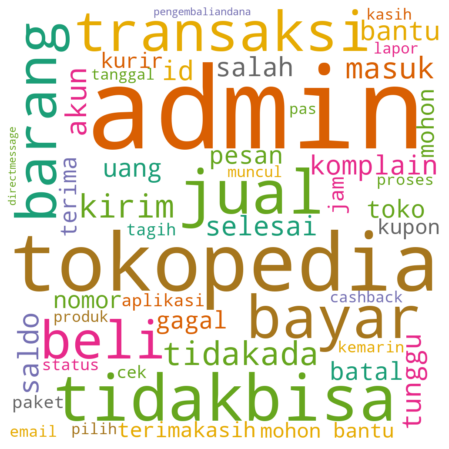

In [41]:
print ("\nWordCloud Positif Tokopedia:")
text_positif_tokopedia = ' '.join(str(word) for word in wp_tokopedia)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_positif_tokopedia) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('positif_tokopedia.png')
plt.show()

print ("WordCloud Negatif Tokopedia:")
text_negatif_tokopedia = ' '.join(str(word) for word in wn_tokopedia)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_negatif_tokopedia) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('negatif_tokopedia.png')
plt.show()



WordCloud Positif Bukalapak:


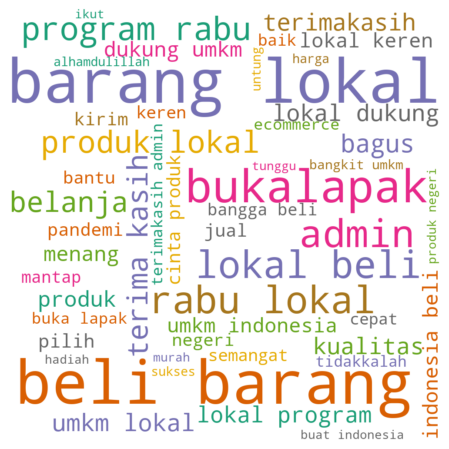

WordCloud Negatif Bukalapak:


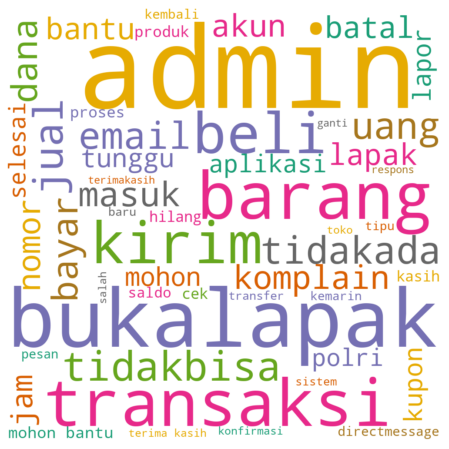

In [42]:
print ("\nWordCloud Positif Bukalapak:")
text_positif_bukalapak = ' '.join(str(word) for word in wp_bukalapak)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_positif_bukalapak) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('positif_bukalapak.png')
plt.show()

print ("WordCloud Negatif Bukalapak:")
text_negatif_bukalapak = ' '.join(str(word) for word in wn_bukalapak)
wordcloud = WordCloud(colormap="Dark2", max_font_size=260, max_words=50, width= 1000, height=1000, background_color='white').generate(text_negatif_bukalapak) 
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.savefig('negatif_bukalapak.png')
plt.show()

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py